In [1]:
import pandas as pd

In [2]:
import numpy as np 

In [15]:
import matplotlib.pyplot as plt

In [16]:
import seaborn as sns

In [55]:
from scipy.stats import ttest_ind

In [17]:
from  sklearn.decomposition import PCA

In [18]:
import os

In [19]:
os.getcwd()

'C:\\Users\\compu magic\\Downloads'

In [20]:
os.chdir("E:\data(1)\data")

In [21]:
diabetes=pd.read_csv("E:\data(1)\data\Diabetes_infection_count.csv",index_col=0)

In [22]:
diabetes

,ZOQM06Q-1011,ZOBX723-1013,ZOBX723-1021,ZOBX723-1022,ZO94RDZ-1011,ZO5QFNX-1012,ZO5QFNX-1013,ZNQOVZV-02,ZNQOVZV-1011,ZNQOVZV-1012,...,ZKFV71L-2011,ZKFV71L-6011,ZKFV71L-6021,ZK4CK8Y-07,ZK4CK8Y-08,ZK4CK8Y-09,ZK4CK8Y-10,ZJXC41N-01,ZJXC41N-02,ZJXC41N-11
A1BG,11,20,36,19,11,10,13,14,4,24,...,8,0,10,12,6,13,12,13,14,19
A1BG-AS1,4,8,4,3,8,0,3,5,3,4,...,0,19,2,0,1,0,0,1,2,3
A1CF,0,1,0,0,5,1,1,2,0,3,...,0,0,1,0,0,0,1,1,4,3
A2M,140,1155,1297,1256,1107,624,331,723,91,1900,...,476,211,823,295,220,70,138,573,1190,1901
A2M-AS1,0,2,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDB,1,5,1,0,2,1,0,2,0,2,...,0,0,0,0,1,1,0,1,0,0
ZXDC,0,8,0,2,8,10,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
ZYX,4,16,4,17,3,63,1,1,4,0,...,2,6,3,0,1,0,0,2,2,4
ZZEF1,0,15,5,18,14,23,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [23]:
metadata=pd.read_csv("E:\data(1)\data\Diabetes_infection_pheno.csv",index_col=0)

In [24]:
metadata

,SubjectID,Days_Since_Start,CL1,CL2,CL3,CL4,Cytokines,ClinicLabs,Metabolites,Proteins,Transcripts,Gut_16S,Nasal_16S,Num_Type
SampleID,,,,,,,,,,,,,,
ZOQM06Q.1011,ZOQM06Q,355.0,NaN,NaN,NaN,Infection,1,1,1,1,1,1,0,6
ZOBX723.1013,ZOBX723,517.0,D7,NaN,Infection_Late,Infection,1,1,1,1,1,0,0,5
ZOBX723.1021,ZOBX723,621.0,D1,NaN,Infection_Early,Infection,1,1,1,1,1,1,0,6
ZOBX723.1022,ZOBX723,623.0,D3,NaN,Infection_Middle,Infection,1,1,1,1,1,0,0,5
ZO94RDZ.1011,ZO94RDZ,721.0,NaN,NaN,NaN,Infection,1,1,1,1,1,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZK4CK8Y.09,ZK4CK8Y,866.0,NaN,NaN,NaN,Healthy,1,1,1,1,1,1,1,7
ZK4CK8Y.10,ZK4CK8Y,942.0,NaN,NaN,NaN,Healthy,1,1,1,1,1,0,1,6
ZJXC41N.01,ZJXC41N,227.0,NaN,NaN,NaN,Healthy,0,1,0,0,1,0,0,2


In [25]:
diabetes.shape

(10346, 397)

In [26]:
metadata.shape

(397, 14)

In [27]:
num_infection=metadata['CL4'].str.contains('Infection').sum()

In [28]:
num_infection

65

In [29]:
num_healthy=metadata['CL4'].str.contains('Healthy').sum()


In [30]:
num_healthy

332

In [31]:
diabetes.iloc[:,0:65]

,ZOQM06Q-1011,ZOBX723-1013,ZOBX723-1021,ZOBX723-1022,ZO94RDZ-1011,ZO5QFNX-1012,ZO5QFNX-1013,ZNQOVZV-02,ZNQOVZV-1011,ZNQOVZV-1012,...,ZL9BTWF-1011,ZL9BTWF-1012,ZL9BTWF-1021,ZL9BTWF-1022,ZL9BTWF-1023,ZL63I8R-1011,ZKVR426-1011,ZKVR426-1012,ZKVR426-1013,ZJXC41N-1011
A1BG,11,20,36,19,11,10,13,14,4,24,...,13,17,15,13,19,10,15,21,13,13
A1BG-AS1,4,8,4,3,8,0,3,5,3,4,...,2,1,1,2,3,2,4,3,1,3
A1CF,0,1,0,0,5,1,1,2,0,3,...,1,0,1,2,3,5,1,0,4,1
A2M,140,1155,1297,1256,1107,624,331,723,91,1900,...,315,923,502,678,1184,977,507,370,1460,487
A2M-AS1,0,2,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDB,1,5,1,0,2,1,0,2,0,2,...,1,0,4,0,2,0,0,3,3,0
ZXDC,0,8,0,2,8,10,0,0,0,0,...,0,5,9,0,0,0,0,3,0,0
ZYX,4,16,4,17,3,63,1,1,4,0,...,3,6,25,2,4,7,3,14,6,1
ZZEF1,0,15,5,18,14,23,0,0,1,0,...,0,9,35,0,0,0,1,17,6,1


In [32]:
diabetes.iloc[ :, 65:]

,ZOQM06Q-01,ZOQM06Q-02,ZOQM06Q-04,ZIS22OE-02,ZOBX723-03,ZOBX723-05,ZOBX723-06,ZOBX723-07,ZO94RDZ-01,ZO94RDZ-05,...,ZKFV71L-2011,ZKFV71L-6011,ZKFV71L-6021,ZK4CK8Y-07,ZK4CK8Y-08,ZK4CK8Y-09,ZK4CK8Y-10,ZJXC41N-01,ZJXC41N-02,ZJXC41N-11
A1BG,17,4,12,29,14,4,11,9,10,13,...,8,0,10,12,6,13,12,13,14,19
A1BG-AS1,4,1,2,3,7,9,8,1,2,2,...,0,19,2,0,1,0,0,1,2,3
A1CF,0,2,0,4,28,6,17,7,1,2,...,0,0,1,0,0,0,1,1,4,3
A2M,221,448,456,2804,193,1225,608,497,970,793,...,476,211,823,295,220,70,138,573,1190,1901
A2M-AS1,0,0,0,0,16,1,1,2,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDB,2,0,0,0,16,0,7,5,0,0,...,0,0,0,0,1,1,0,1,0,0
ZXDC,1,0,0,0,9,1,9,1,0,2,...,0,0,0,0,0,0,0,1,0,1
ZYX,7,1,4,3,25,0,7,10,2,0,...,2,6,3,0,1,0,0,2,2,4
ZZEF1,1,0,0,1,54,3,17,12,1,1,...,0,0,0,0,1,0,0,0,0,1


In [33]:
missing_value=diabetes.isnull().sum().sum()

In [34]:
missing_value

0

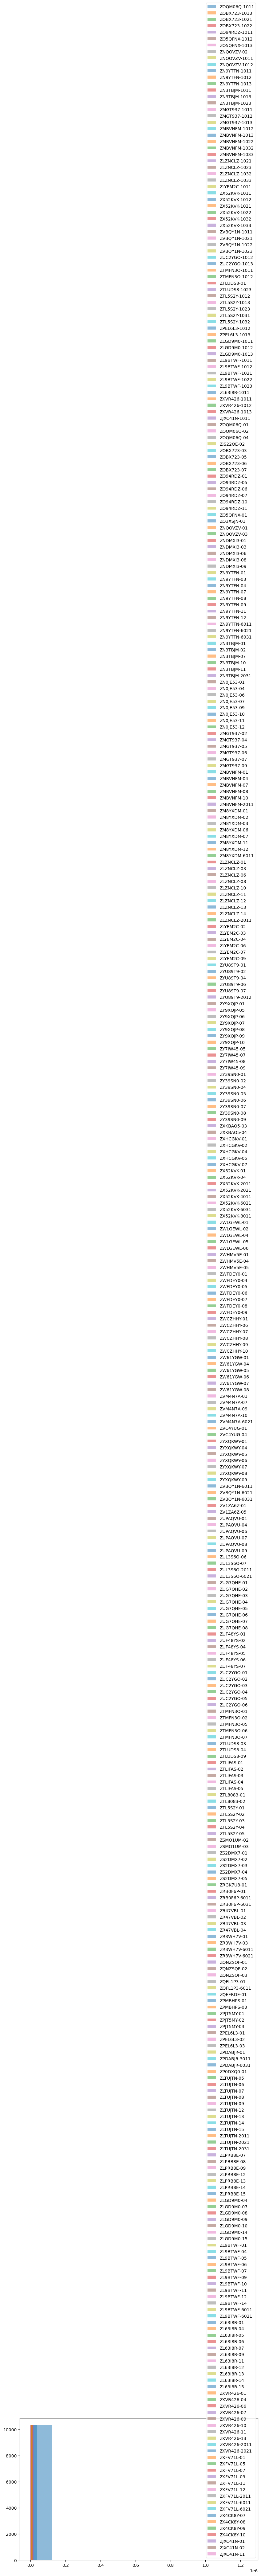

In [35]:
plt.figure(figsize=(10,6))
for col in diabetes.columns:
           plt.hist(diabetes[col],alpha=.5,label=col)
plt.legend()
plt.show()

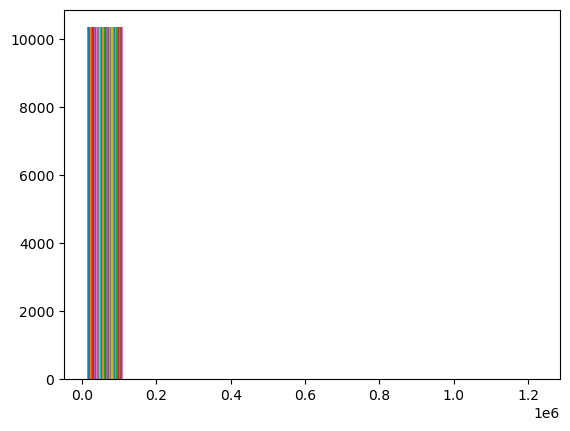

In [36]:
plt.hist(diabetes, bins=10)
plt.show()

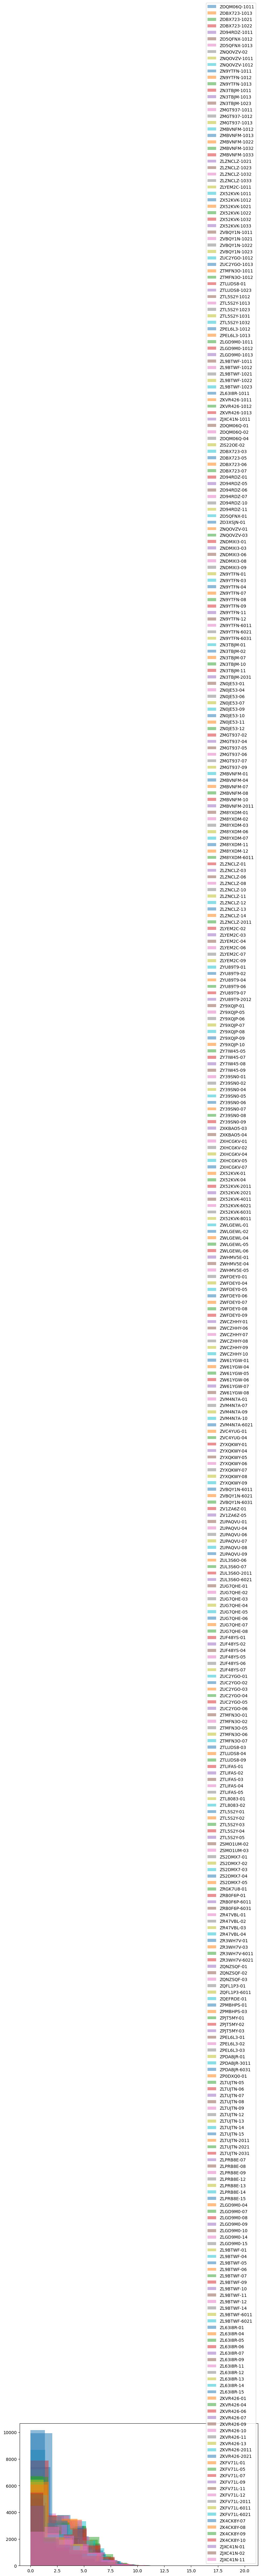

In [37]:
plt.figure(figsize=(10,6))
for col in diabetes.columns:
           plt.hist(np.log2(diabetes[col]+1),alpha=.5,label=col)
plt.legend()
plt.show()

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:

scaler = StandardScaler()

In [41]:
diabetes_scaled_data = scaler.fit_transform(diabetes)

In [43]:
diabetes_scaled_df = pd.DataFrame(diabetes_scaled_data, index=diabetes.index,columns=diabetes.columns)

In [44]:
diabetes_scaled_df

,ZOQM06Q-1011,ZOBX723-1013,ZOBX723-1021,ZOBX723-1022,ZO94RDZ-1011,ZO5QFNX-1012,ZO5QFNX-1013,ZNQOVZV-02,ZNQOVZV-1011,ZNQOVZV-1012,...,ZKFV71L-2011,ZKFV71L-6011,ZKFV71L-6021,ZK4CK8Y-07,ZK4CK8Y-08,ZK4CK8Y-09,ZK4CK8Y-10,ZJXC41N-01,ZJXC41N-02,ZJXC41N-11
A1BG,-0.038280,-0.037535,0.155671,-0.026628,-0.112887,-0.120402,-0.027026,-0.031650,-0.110546,0.000284,...,-0.043843,-0.182881,-0.021945,-0.040493,-0.024466,-0.026727,-0.044670,-0.066632,-0.035837,-0.048960
A1BG-AS1,-0.115508,-0.141247,-0.157817,-0.158823,-0.140414,-0.225266,-0.126647,-0.116760,-0.123081,-0.137883,...,-0.133731,0.079460,-0.036908,-0.179317,-0.031658,-0.170209,-0.166411,-0.179704,-0.132677,-0.175824
A1CF,-0.159638,-0.201746,-0.197003,-0.183610,-0.167941,-0.214779,-0.146571,-0.145129,-0.160685,-0.144791,...,-0.133731,-0.182881,-0.038778,-0.179317,-0.033097,-0.170209,-0.156266,-0.179704,-0.116537,-0.175824
A2M,1.384921,9.771931,12.509075,10.193702,9.943748,6.318238,3.140909,6.673079,0.979989,12.960315,...,5.214620,2.730493,1.498695,3.233422,0.283371,0.602385,1.233611,5.210066,9.454439,14.873480
A2M-AS1,-0.159638,-0.193103,-0.197003,-0.183610,-0.204645,-0.225266,-0.156533,-0.154586,-0.135616,-0.165516,...,-0.133731,-0.182881,-0.040649,-0.179317,-0.033097,-0.170209,-0.156266,-0.179704,-0.148817,-0.199611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDB,-0.148606,-0.167175,-0.187207,-0.183610,-0.195469,-0.214779,-0.156533,-0.145129,-0.160685,-0.151700,...,-0.133731,-0.182881,-0.040649,-0.179317,-0.031658,-0.159172,-0.166411,-0.179704,-0.148817,-0.199611
ZXDC,-0.159638,-0.141247,-0.197003,-0.167085,-0.140414,-0.120402,-0.156533,-0.164043,-0.160685,-0.165516,...,-0.133731,-0.182881,-0.040649,-0.179317,-0.033097,-0.170209,-0.166411,-0.179704,-0.148817,-0.191682
ZYX,-0.115508,-0.072105,-0.157817,-0.043153,-0.186293,0.435377,-0.146571,-0.154586,-0.110546,-0.165516,...,-0.111259,-0.100037,-0.035038,-0.179317,-0.031658,-0.170209,-0.166411,-0.170281,-0.132677,-0.167895
ZZEF1,-0.159638,-0.080748,-0.148021,-0.034890,-0.085360,0.015921,-0.156533,-0.164043,-0.148151,-0.165516,...,-0.133731,-0.182881,-0.040649,-0.179317,-0.031658,-0.170209,-0.166411,-0.189127,-0.148817,-0.191682


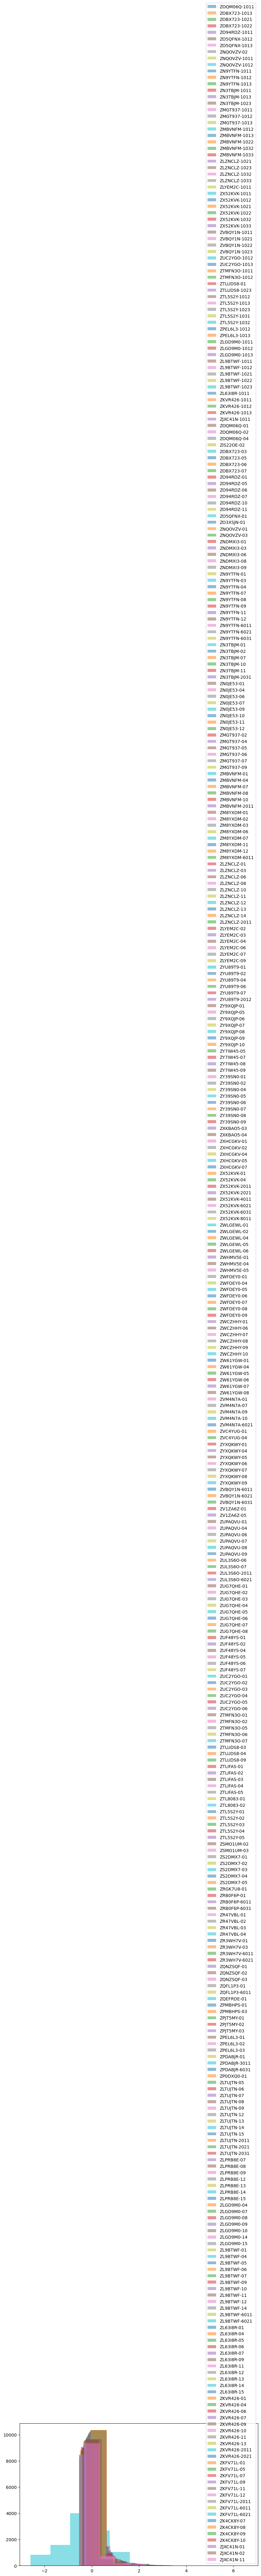

In [47]:
plt.figure(figsize=(10,6))
for col in diabetes_scaled_df.columns:
           plt.hist(np.log2(diabetes_scaled_df[col]+1),alpha=.5,label=col)
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

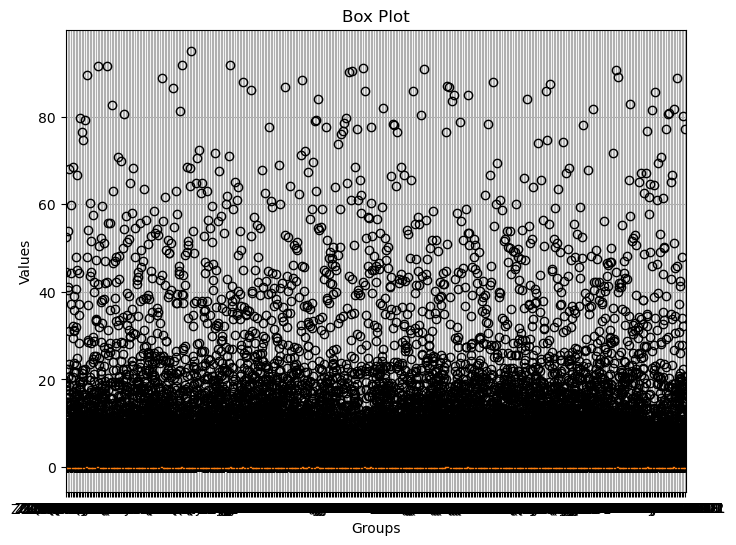

In [95]:

plt.figure(figsize=(8, 6))
plt.boxplot(diabetes_scaled_df.values, labels=diabetes_scaled_df.columns)
plt.xlabel('Groups')
plt.ylabel('Values')
plt.title('Box Plot')
plt.grid(True)
plt.show

In [48]:
patient_mean=np.mean(np.log2(diabetes_scaled_df.iloc[:,0:65]+1),axis=1)

In [49]:
patient_mean

A1BG       -0.042865
A1BG-AS1   -0.238528
A1CF       -0.255815
A2M         2.915026
A2M-AS1    -0.288917
              ...   
ZXDB       -0.276166
ZXDC       -0.265686
ZYX        -0.191630
ZZEF1      -0.221942
ZZZ3       -0.258117
Length: 10346, dtype: float64

In [50]:
normal_mean=np.mean(np.log2(diabetes_scaled_df.iloc[:,65:]+1),axis=1)

In [51]:
normal_mean

A1BG       -0.055994
A1BG-AS1   -0.232817
A1CF       -0.234009
A2M         2.862683
A2M-AS1    -0.279570
              ...   
ZXDB       -0.268876
ZXDC       -0.272489
ZYX        -0.205034
ZZEF1      -0.238957
ZZZ3       -0.259543
Length: 10346, dtype: float64

In [52]:
foldchange=patient_mean-normal_mean

In [53]:
foldchange

A1BG        0.013129
A1BG-AS1   -0.005711
A1CF       -0.021806
A2M         0.052343
A2M-AS1    -0.009347
              ...   
ZXDB       -0.007290
ZXDC        0.006802
ZYX         0.013404
ZZEF1       0.017015
ZZZ3        0.001425
Length: 10346, dtype: float64

In [56]:
    t_stat, p_values = ttest_ind(diabetes_scaled_df.iloc[:, :65], diabetes_scaled_df.iloc[:, 65:], axis=1)

In [57]:
p_values

array([0.387007  , 0.60809421, 0.17711137, ..., 0.29685757, 0.53242598,
       0.99454504])

In [58]:
diabetes_result=pd.DataFrame({"fold":foldchange,"p_adj":p_values})

In [60]:
diabetes_result

,fold,p_adj
A1BG,0.013129,0.387007
A1BG-AS1,-0.005711,0.608094
A1CF,-0.021806,0.177111
A2M,0.052343,0.876097
A2M-AS1,-0.009347,0.447621
...,...,...
ZXDB,-0.007290,0.544087
ZXDC,0.006802,0.617333
ZYX,0.013404,0.296858
ZZEF1,0.017015,0.532426


In [75]:
final_diabetes=diabetes_result[(diabetes_result['p_adj']<.05)&(abs(diabetes_result["fold"])>.2)]

In [76]:
final_diabetes

,fold,p_adj
FLNA,0.228356,0.023450
NCAPH2,0.339953,0.000008
RMRP,0.236485,0.049768
TCOF1,0.228925,0.032926


In [77]:
final_diabetes.shape

(4, 2)

In [78]:
final_diabetes.to_csv('E:\\data(1)\\data\\final_diabetes.csv')

In [ ]:
##### pca 

In [79]:
diabetes_scaled_df

,ZOQM06Q-1011,ZOBX723-1013,ZOBX723-1021,ZOBX723-1022,ZO94RDZ-1011,ZO5QFNX-1012,ZO5QFNX-1013,ZNQOVZV-02,ZNQOVZV-1011,ZNQOVZV-1012,...,ZKFV71L-2011,ZKFV71L-6011,ZKFV71L-6021,ZK4CK8Y-07,ZK4CK8Y-08,ZK4CK8Y-09,ZK4CK8Y-10,ZJXC41N-01,ZJXC41N-02,ZJXC41N-11
A1BG,-0.038280,-0.037535,0.155671,-0.026628,-0.112887,-0.120402,-0.027026,-0.031650,-0.110546,0.000284,...,-0.043843,-0.182881,-0.021945,-0.040493,-0.024466,-0.026727,-0.044670,-0.066632,-0.035837,-0.048960
A1BG-AS1,-0.115508,-0.141247,-0.157817,-0.158823,-0.140414,-0.225266,-0.126647,-0.116760,-0.123081,-0.137883,...,-0.133731,0.079460,-0.036908,-0.179317,-0.031658,-0.170209,-0.166411,-0.179704,-0.132677,-0.175824
A1CF,-0.159638,-0.201746,-0.197003,-0.183610,-0.167941,-0.214779,-0.146571,-0.145129,-0.160685,-0.144791,...,-0.133731,-0.182881,-0.038778,-0.179317,-0.033097,-0.170209,-0.156266,-0.179704,-0.116537,-0.175824
A2M,1.384921,9.771931,12.509075,10.193702,9.943748,6.318238,3.140909,6.673079,0.979989,12.960315,...,5.214620,2.730493,1.498695,3.233422,0.283371,0.602385,1.233611,5.210066,9.454439,14.873480
A2M-AS1,-0.159638,-0.193103,-0.197003,-0.183610,-0.204645,-0.225266,-0.156533,-0.154586,-0.135616,-0.165516,...,-0.133731,-0.182881,-0.040649,-0.179317,-0.033097,-0.170209,-0.156266,-0.179704,-0.148817,-0.199611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDB,-0.148606,-0.167175,-0.187207,-0.183610,-0.195469,-0.214779,-0.156533,-0.145129,-0.160685,-0.151700,...,-0.133731,-0.182881,-0.040649,-0.179317,-0.031658,-0.159172,-0.166411,-0.179704,-0.148817,-0.199611
ZXDC,-0.159638,-0.141247,-0.197003,-0.167085,-0.140414,-0.120402,-0.156533,-0.164043,-0.160685,-0.165516,...,-0.133731,-0.182881,-0.040649,-0.179317,-0.033097,-0.170209,-0.166411,-0.179704,-0.148817,-0.191682
ZYX,-0.115508,-0.072105,-0.157817,-0.043153,-0.186293,0.435377,-0.146571,-0.154586,-0.110546,-0.165516,...,-0.111259,-0.100037,-0.035038,-0.179317,-0.031658,-0.170209,-0.166411,-0.170281,-0.132677,-0.167895
ZZEF1,-0.159638,-0.080748,-0.148021,-0.034890,-0.085360,0.015921,-0.156533,-0.164043,-0.148151,-0.165516,...,-0.133731,-0.182881,-0.040649,-0.179317,-0.031658,-0.170209,-0.166411,-0.189127,-0.148817,-0.191682


In [80]:
diabetes_scaled_df2=diabetes_scaled_df.T

In [81]:
diabetes_scaled_df2

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,AAED1,AAGAB,AAK1,...,ZSWIM5,ZSWIM7,ZSWIM8,ZSWIM8-AS1,ZXDA,ZXDB,ZXDC,ZYX,ZZEF1,ZZZ3
ZOQM06Q-1011,-0.038280,-0.115508,-0.159638,1.384921,-0.159638,-0.159638,-0.060345,-0.137573,-0.159638,-0.115508,...,-0.159638,-0.148606,0.138241,1.793125,-0.159638,-0.148606,-0.159638,-0.115508,-0.159638,-0.148606
ZOBX723-1013,-0.037535,-0.141247,-0.201746,9.771931,-0.193103,-0.210389,0.506955,-0.167175,-0.175818,-0.089391,...,-0.201746,-0.167175,1.293441,2.140426,-0.193103,-0.167175,-0.141247,-0.072105,-0.080748,-0.201746
ZOBX723-1021,0.155671,-0.157817,-0.197003,12.509075,-0.197003,-0.157817,0.821834,-0.197003,-0.118631,-0.157817,...,-0.187207,-0.128427,1.458608,1.879858,-0.177410,-0.187207,-0.197003,-0.157817,-0.148021,-0.177410
ZOBX723-1022,-0.026628,-0.158823,-0.183610,10.193702,-0.183610,-0.183610,0.617823,-0.175348,-0.183610,-0.018366,...,-0.175348,-0.167085,0.873951,1.758005,-0.175348,-0.183610,-0.167085,-0.043153,-0.034890,-0.158823
ZO94RDZ-1011,-0.112887,-0.140414,-0.167941,9.943748,-0.204645,-0.204645,0.456010,-0.204645,-0.122063,-0.076184,...,-0.204645,-0.149590,1.263477,1.814023,-0.195469,-0.195469,-0.140414,-0.186293,-0.085360,-0.140414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZK4CK8Y-09,-0.026727,-0.170209,-0.170209,0.602385,-0.170209,-0.170209,-0.126061,-0.159172,-0.159172,-0.159172,...,-0.159172,-0.159172,0.061569,2.611130,-0.170209,-0.159172,-0.170209,-0.170209,-0.170209,-0.159172
ZK4CK8Y-10,-0.044670,-0.166411,-0.156266,1.233611,-0.156266,-0.166411,-0.105541,-0.166411,-0.166411,-0.156266,...,-0.156266,-0.166411,0.016200,2.501747,-0.166411,-0.166411,-0.166411,-0.166411,-0.166411,-0.166411
ZJXC41N-01,-0.066632,-0.179704,-0.179704,5.210066,-0.179704,-0.179704,0.131244,-0.189127,-0.179704,-0.179704,...,-0.189127,-0.151436,0.470461,2.364418,-0.189127,-0.179704,-0.179704,-0.170281,-0.189127,-0.170281
ZJXC41N-02,-0.035837,-0.132677,-0.116537,9.454439,-0.148817,-0.124607,0.488710,-0.140747,-0.100397,-0.092327,...,-0.148817,-0.076187,1.400616,1.537805,-0.148817,-0.148817,-0.148817,-0.132677,-0.148817,-0.148817


In [82]:
nan_value=diabetes_scaled_df2.isna().sum()

In [83]:
nan_value

A1BG        0
A1BG-AS1    0
A1CF        0
A2M         0
A2M-AS1     0
           ..
ZXDB        0
ZXDC        0
ZYX         0
ZZEF1       0
ZZZ3        0
Length: 10346, dtype: int64

In [ ]:
####diabetes_scaled_df2.fillna(diabetes.mean(),inplace=True)

In [84]:
pca=PCA(n_components=2)

In [85]:
diabetes_pca=pca.fit_transform(diabetes_scaled_df2)

In [86]:
diabetes_pca

array([[-3.21769002e+01, -2.47141539e+01],
       [ 3.82960819e+01,  1.17593389e+01],
       [ 6.43739130e+00,  4.45272490e+01],
       [ 4.84458261e+01,  1.68530714e+01],
       [ 6.97468610e+00,  4.39180531e+01],
       [ 1.49175769e+01,  1.08037930e+01],
       [-1.68468123e+01,  1.42881399e+01],
       [ 3.02461578e+00,  4.09242881e+01],
       [-2.65474440e+01, -1.02268631e+01],
       [ 1.69002950e+01,  5.61738350e+01],
       [ 1.60698381e+01,  5.41622703e+01],
       [ 1.42012194e+01,  5.24449629e+01],
       [ 2.02388875e+01,  5.74494223e+01],
       [ 9.48017924e+01, -4.62191444e+01],
       [ 2.55310352e+01,  1.69242904e+01],
       [ 2.32400505e+00,  3.68268783e+01],
       [-1.71855357e+01, -2.86706790e+01],
       [-1.48754747e+01, -2.42765505e+01],
       [-3.08926802e+01, -2.46180344e+01],
       [-2.91953749e+01, -2.21895319e+01],
       [ 1.02830545e+02, -5.45241708e+01],
       [-2.70032438e+01, -2.01976762e+01],
       [-3.18058672e+01, -2.36189303e+01],
       [-5.

In [87]:
dataframe_pca=pd.DataFrame(data=diabetes_pca,columns=['pc1','pc2'])

In [88]:
dataframe_pca

,pc1,pc2
0,-32.176900,-24.714154
1,38.296082,11.759339
2,6.437391,44.527249
3,48.445826,16.853071
4,6.974686,43.918053
...,...,...
392,-24.525102,-9.758083
393,-25.414866,-4.387315
394,-11.325838,23.070422
395,45.999543,44.824719


In [89]:
dataframe_pca['sampletype']=np.array(metadata["CL4"])

In [90]:
dataframe_pca

,pc1,pc2,sampletype
0,-32.176900,-24.714154,Infection
1,38.296082,11.759339,Infection
2,6.437391,44.527249,Infection
3,48.445826,16.853071,Infection
4,6.974686,43.918053,Infection
...,...,...,...
392,-24.525102,-9.758083,Healthy
393,-25.414866,-4.387315,Healthy
394,-11.325838,23.070422,Healthy
395,45.999543,44.824719,Healthy


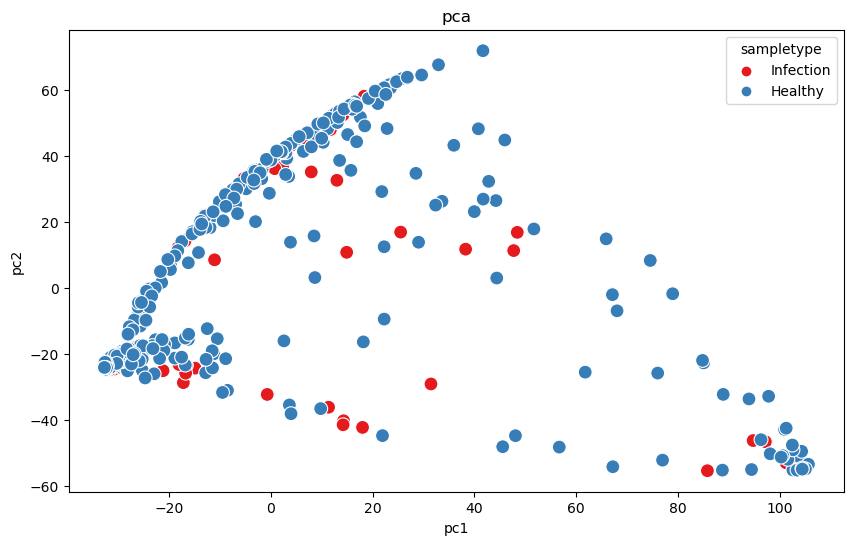

In [91]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dataframe_pca,x='pc1',y='pc2',hue='sampletype',palette='Set1',s=100)
plt.title("pca")
plt.xlabel('pc1')
plt.legend(title='sampletype')
plt.show()

In [ ]:
###3#